In [1]:
import pandas as pd
pd.options.display.max_rows = 99
pd.options.display.max_columns = 999
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json, requests

In [3]:
# Problem 1: Data Acquisition and Analysis

In [4]:
# 1. Download and combine data from the open data portal for the past year about the 
# following 311 requests

In [5]:
df_g = pd.read_csv('data/311_Service_Requests_-_Graffiti_Removal.csv')
df_p = pd.read_csv('data/311_Service_Requests_-_Pot_Holes_Reported.csv')
df_s = pd.read_csv('data/311_Service_Requests_-_Sanitation_Code_Complaints.csv')
df_v = pd.read_csv('data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv')
df_neig = pd.read_csv('data/CommAreas.csv')

df_g.columns = [x.lower() for x in df_g.columns]
df_p.columns = [x.lower() for x in df_p.columns]
df_s.columns = [x.lower() for x in df_s.columns]
df_v.columns = [x.lower() for x in df_v.columns]

df_g = df_g.rename(columns={'what type of surface is the graffiti on?':'subtype'})
df_p = df_p.rename(columns={'zip':'zip code'})
df_s = df_s.rename(columns={'what is the nature of this code violation?':'subtype'})
df_v = df_v.rename(columns={'service request type': 'type of service request',  'date service request was received':'creation date', 'location of building on the lot (if garage, change type code to bgd).':'subtype'})

df_s.drop(0,inplace=True) #there is extra colume(the header) in df_s and df_v
df_v.drop(0,inplace=True)

df_g['type of service request'] = 'Graffiti Removal'
df_p['type of service request'] = 'Pot Hole in Street'
df_s['type of service request'] = 'Sanitation Code Violation'
df_v['type of service request'] = 'Vacant/Abandoned Building'

/Users/ZHU/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Deal with address segmentation in df_v
df_v['street address'] = df_v['address street number'].astype(str)+" "+df_v['address street direction']+" "+df_v['address street name']+" "+df_v['address street suffix']
df_comb = pd.concat([df_g,df_p,df_s,df_v], axis=0)
df_comb['creation date'] = pd.to_datetime(df_comb['creation date'],format='%m/%d/%Y')
df_comb['completion date'] = pd.to_datetime(df_comb['completion date'],format='%m/%d/%Y')
df_comb = df_comb[df_comb['creation date'] > '03/01/2016']
df_comb['response time'] = df_comb['completion date'] - df_comb['creation date']

In [7]:
#2. Generate summary statistics for these requests including but not limited to
#number of requests of each type (and subtype within each of the types
#above) over time, by neighborhood, response time by the city. Please use a
#combination of tables and graphs to present these summary stats.

In [8]:
counts = df_comb['type of service request'].value_counts(normalize = True)
counts

Graffiti Removal             0.586356
Pot Hole in Street           0.284083
Sanitation Code Violation    0.106103
Vacant/Abandoned Building    0.023457
Name: type of service request, dtype: float64

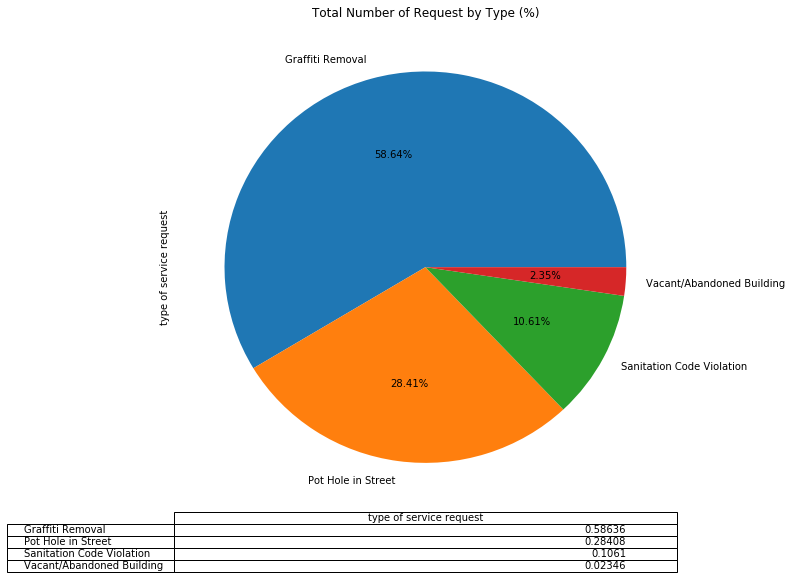

In [9]:
counts.plot.pie(autopct='%.2f%%',table=np.round(counts,5),fontsize=10, figsize=(9, 9),title="Total Number of Request by Type (%)")
plt.show()

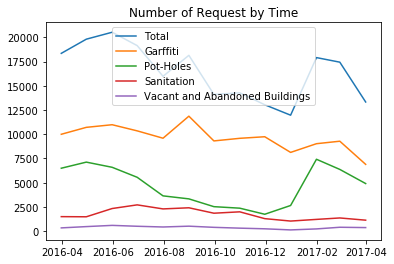

In [10]:
is_g = df_comb['type of service request'] == "Graffiti Removal"
is_p = df_comb['type of service request'] == "Pot Hole in Street"
is_s = df_comb['type of service request'] == "Sanitation Code Violation"
is_v = df_comb['type of service request'] == "Vacant/Abandoned Building"

g_request = df_comb[is_g]
p_request = df_comb[is_p]
s_request = df_comb[is_s]
v_request = df_comb[is_v]

comb_bytime = df_comb.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(comb_bytime, label='Total')

g_bytime = g_request.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(g_bytime, label='Garffiti')

p_bytime = p_request.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(p_bytime, label='Pot-Holes')

s_bytime = s_request.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(s_bytime, label='Sanitation')

v_bytime = v_request.groupby(pd.Grouper(key='creation date', freq='m')).size()
plt.plot(v_bytime, label='Vacant and Abandoned Buildings')

plt.title('Number of Request by Time') ; plt.legend(loc='best'); plt.show()

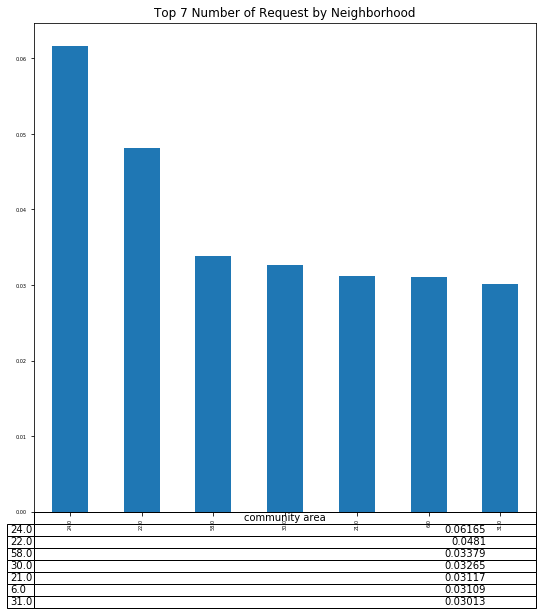

In [11]:
neig_counts = df_comb['community area'].value_counts(normalize=True).nlargest(7)
neig_counts.plot.bar(table=np.round(neig_counts, 5),fontsize=5, figsize=(9, 9),title='Top 7 Number of Request by Neighborhood')
plt.show()

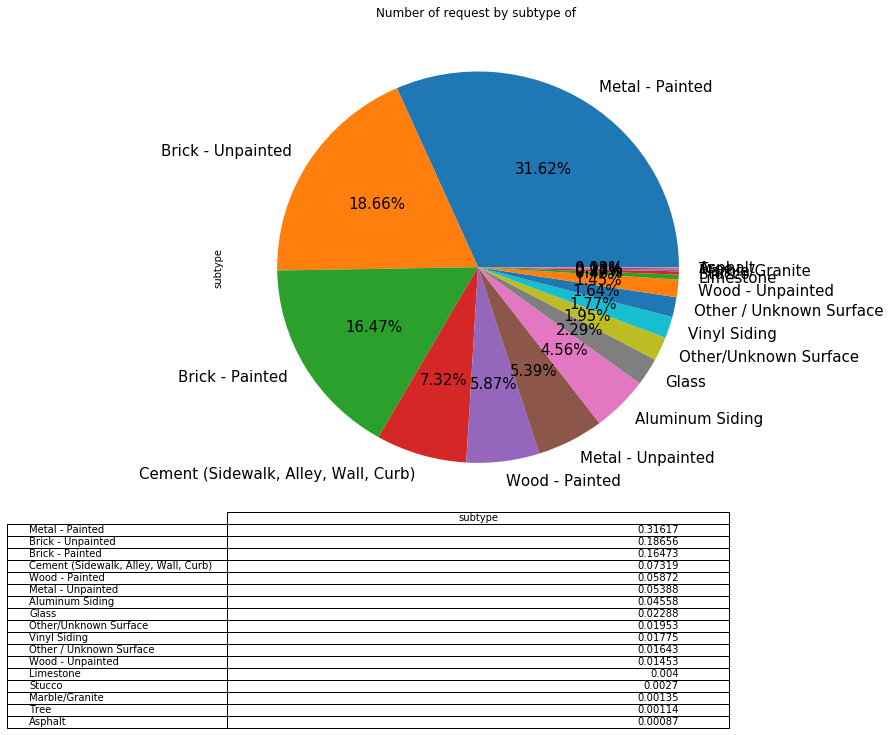

In [13]:
g_type_counts = g_request['subtype'].value_counts(normalize=True)
g_type_counts.plot.pie(autopct='%.2f%%',table=np.round(g_type_counts,5),fontsize=15, figsize=(9, 9), title='Number of request by subtype of ')

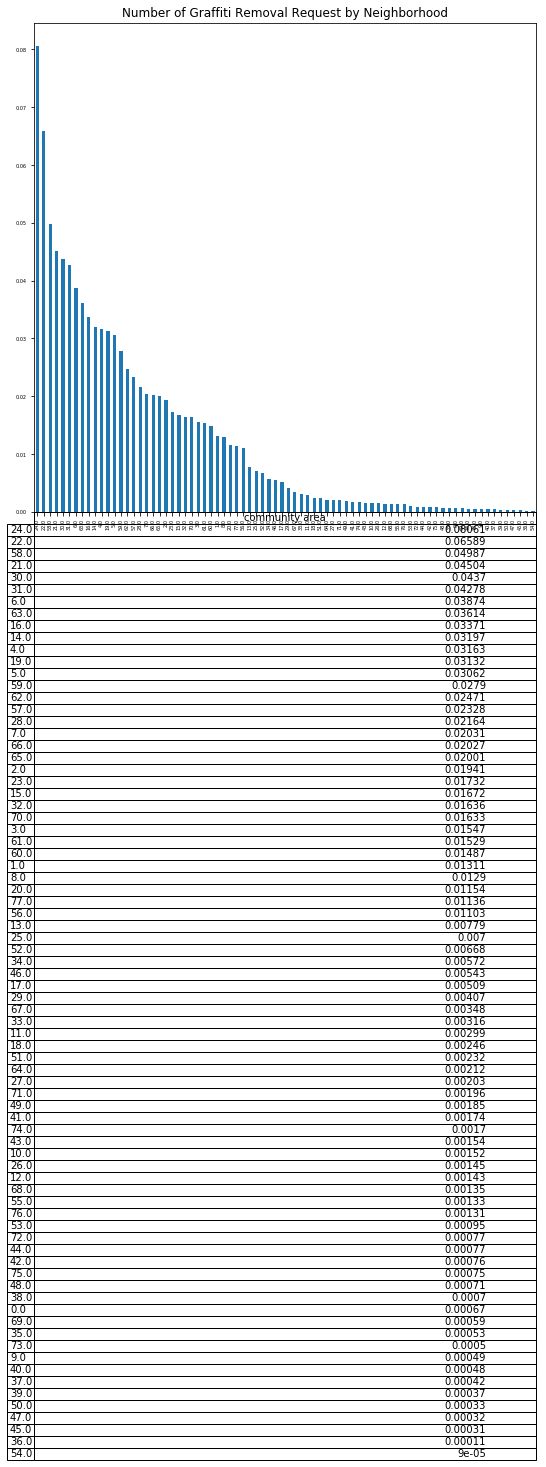

In [14]:
g_neig_counts = g_request['community area'].value_counts(normalize=True)
g_neig_counts.plot.bar(table=np.round(g_neig_counts, 5),fontsize=5, figsize=(9, 9), title = 'Number of Graffiti Removal Request by Neighborhood')
plt.show()

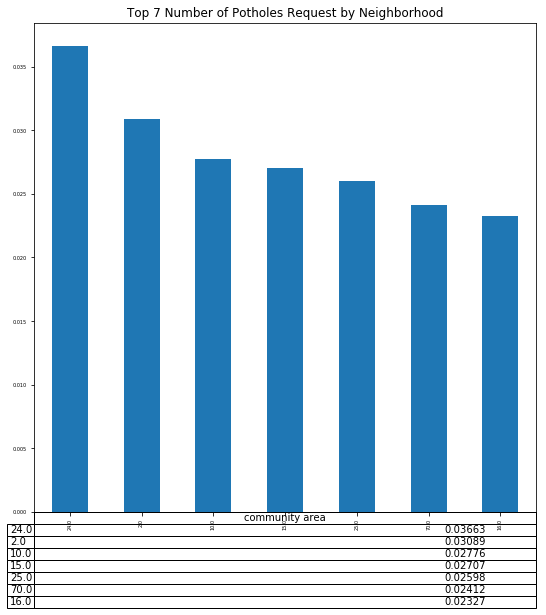

In [15]:
p_neig_counts = p_request['community area'].value_counts(normalize=True).nlargest(7)
p_neig_counts.plot.bar(table=np.round(p_neig_counts, 5),fontsize=5, figsize=(9, 9),title = 'Top 7 Number of Potholes Request by Neighborhood')
plt.show()

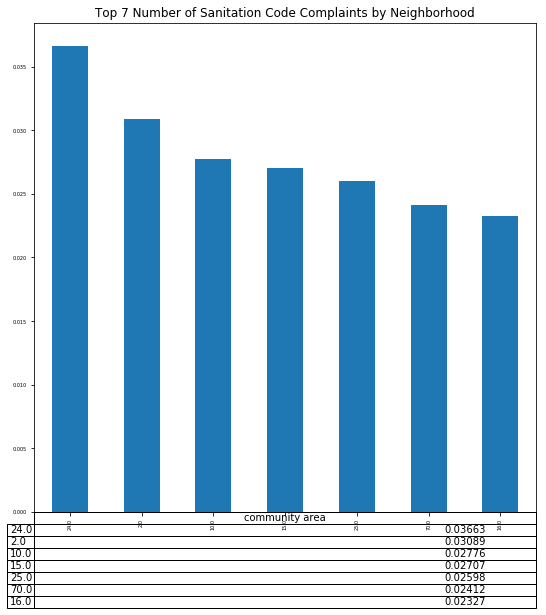

In [16]:
s_neig_counts = p_request['community area'].value_counts(normalize=True).nlargest(7)
s_neig_counts.plot.bar(table=np.round(s_neig_counts, 5),fontsize=5, figsize=(9, 9),title = 'Top 7 Number of Sanitation Code Complaints by Neighborhood')
plt.show()

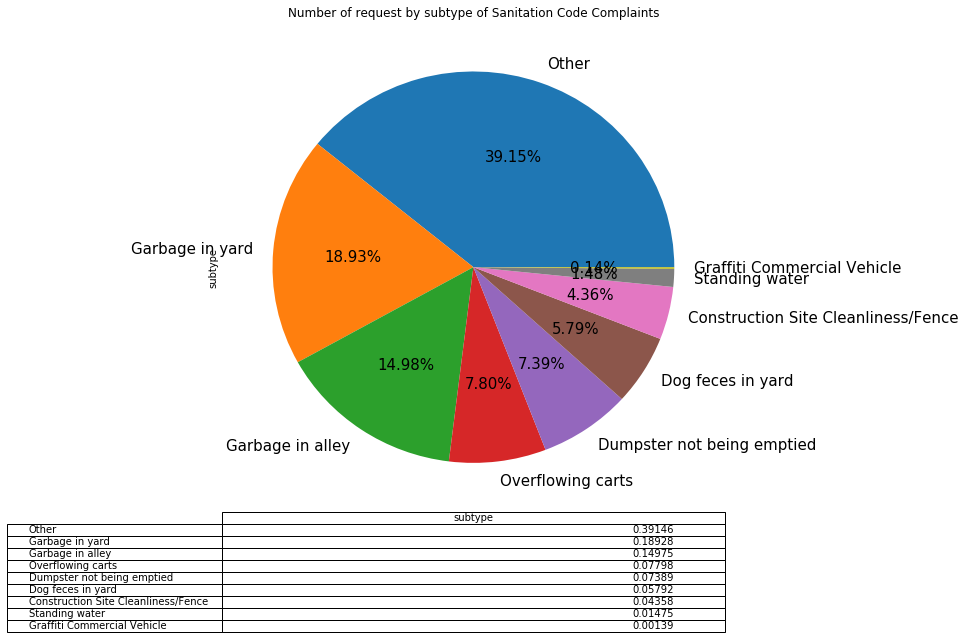

In [17]:
s_type_counts = s_request['subtype'].value_counts(normalize=True)
s_type_counts.plot.pie(autopct='%.2f%%',table=np.round(s_type_counts,5),fontsize=15, figsize=(9, 9),title='Number of request by subtype of Sanitation Code Complaints')
plt.show()

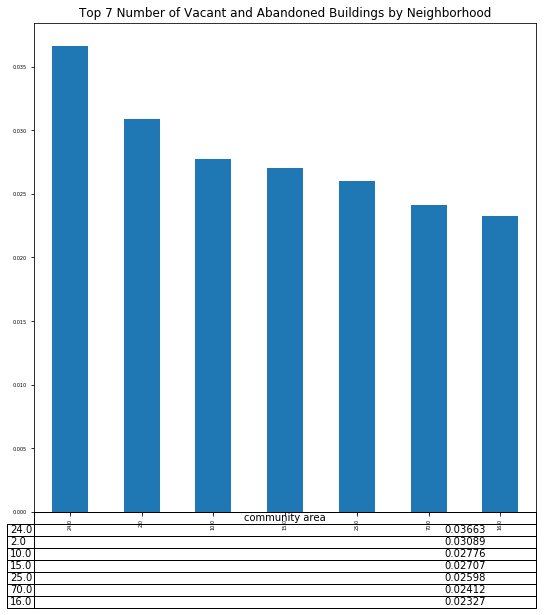

In [18]:
v_neig_counts = p_request['community area'].value_counts(normalize=True).nlargest(7)
v_neig_counts.plot.bar(table=np.round(v_neig_counts, 5),fontsize=5, figsize=(9, 9),title = 'Top 7 Number of Vacant and Abandoned Buildings by Neighborhood')
plt.show()

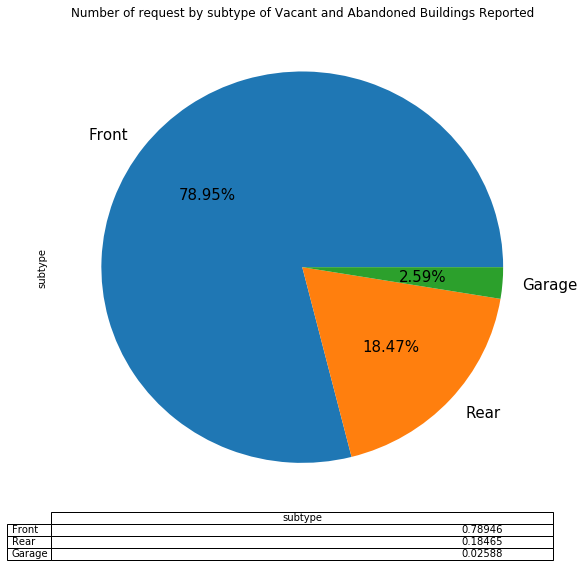

In [19]:
v_type_counts = v_request['subtype'].value_counts(normalize=True)
v_type_counts.plot.pie(autopct='%.2f%%',table=np.round(v_type_counts,5),fontsize=15, figsize=(9, 9),title='Number of request by subtype of Vacant and Abandoned Buildings Reported')
plt.show()

In [20]:
response_bytype = df_comb.groupby('type of service request')['response time'].describe()
response_bytype

type of service request         
Graffiti Removal           count                     125153
                           mean      0 days 16:00:25.313016
                           std       1 days 09:10:01.986664
                           min              0 days 00:00:00
                           25%              0 days 00:00:00
                           50%              0 days 00:00:00
                           75%              1 days 00:00:00
                           max            330 days 00:00:00
Pot Hole in Street         count                      57828
                           mean     22 days 04:22:44.100435
                           std      34 days 17:06:17.981599
                           min              0 days 00:00:00
                           25%              1 days 00:00:00
                           50%              7 days 00:00:00
                           75%             27 days 00:00:00
                           max            342 days 00:00:00
Sanitat

In [21]:
#3 month data for Sanitation and Buildings 
df_new = df_comb[df_comb['creation date'] > '01/01/2017']
df_new = df_new.loc[df_new['type of service request'].isin(['Sanitation Code Violation','Vacant/Abandoned Building'])]
new_col = pd.DataFrame(columns=['tract','Income','Household Size','ppl','Asian ppl'])
df_new = df_new.join(new_col).dropna(subset=['latitude','longitude']).reset_index(drop=True)

In [22]:
def get_fips(lat,lon):
    d = {}
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format={}'.format(lat,lon,'json')  
    resp = requests.get(url)
    result = json.loads(resp.text)['Results']['block'][0]
    fips = result['FIPS']
    state = fips[0:2]
    county = fips[2:5]
    tract = fips[5:11]
    block = fips[11:15]
    d['state'] =state
    d['county'] = county
    d['tract'] = tract
    d['block'] = block
    return d

In [24]:
def get_attribute(lat, lon):
    key = '6c0857584068f1ece221692ecbcebf9151de93a0'
    code = 'B19301_001E,B25010_001E,B01003_001E,B02011_001E'
    # B19301_001E: Per Capita Income
    # B25010_001E: Avg Household Size
    # B01003_001E: Population
    # B02011_001E: Asian population
    d = get_fips(lat, lon)
    state = d['state'] 
    county = d['county']
    tract = d['tract'] 
    block = d['block']
    url = 'http://api.census.gov/data/2011/acs5?get={}&for=tract:{}&in=state:{}+county:{}&key={}'.format(code,tract,state,county,key)
    info = requests.get(url).json()[1]
    return info

In [ ]:
for i in range(len(df_new)):
    lat = df_new.iloc[i]['latitude']
    lon = df_new.iloc[i]['longitude']
    info = get_attribute(lat, lon)
    df_new.loc[i,'tract'] = info[6]
    df_new.loc[i,'Income'] = info[0] 
    df_new.loc[i,'Household Size'] = info[1] 
    df_new.loc[i,'ppl'] = info[2] 
    df_new.loc[i,'Asian ppl'] = info[3]

In [ ]:
is_v = df_new['type of service request'] == 'Vacant/Abandoned Building'
is_s = df_new['type of service request'] == 'Sanitation Code Violation'

in_jan = (df_new["creation date"] >= "2017-01-01") & (df_new["creation date"] <= "2017-01-31")
in_feb = (df_new["creation date"] >= "2017-02-01") & (df_new["creation date"] <= "2017-02-28")
in_mar = (df_new["creation date"] >= "2017-03-01") & (df_new["creation date"] <= "2017-03-31")

df_new[(is_v | in_jan)]
df_new[(is_v | in_feb)]
df_new[(is_v | in_mar)]

df_new[(is_s | in_jan)]
df_new[(is_s | in_feb)]
df_new[(is_s | in_mar)]


In [ ]:
# Problem 3

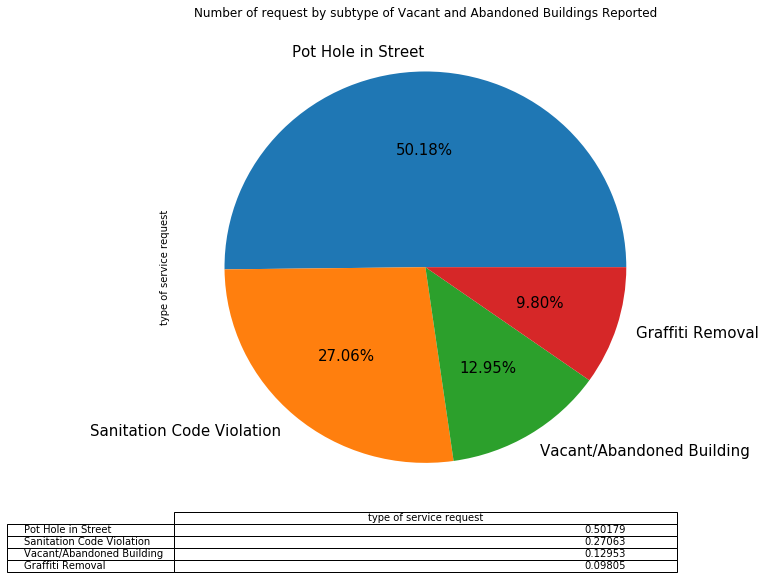

In [371]:
AG_type_counts = df_comb[df_comb['community area'] == 71.0]['type of service request'].value_counts(normalize=True)
AG_type_counts.plot.pie(autopct='%.2f%%',table=np.round(AG_type_counts,5),fontsize=15, figsize=(9, 9),title='Number of request by subtype of Vacant and Abandoned Buildings Reported')
plt.show()